<a href="https://colab.research.google.com/github/shivasky18/DL_ASSIGNMENT_1/blob/main/DL_ASSIGNMENT_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Download the MNIST Dataset and Plot Sample Images for Each Class

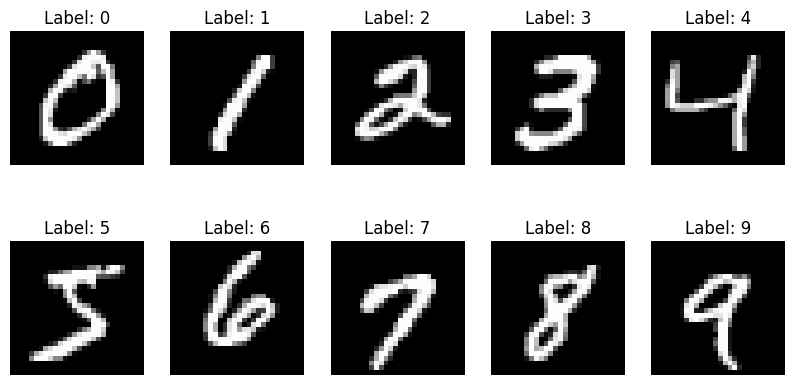

In [2]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

def plot_sample_images(x_train, y_train):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()
    for i in range(10):
        idx = np.where(y_train == i)[0][0]
        axes[i].imshow(x_train[idx], cmap='gray')
        axes[i].set_title(f'Label: {i}')
        axes[i].axis('off')
    plt.show()


plot_sample_images(x_train, y_train)


Feedforward Neural Network

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, Adam, RMSprop

def build_model(input_shape, num_hidden_layers=3, neurons_per_layer=64, activation='relu', optimizer='adam', dropout_rate=0.0):
    model = Sequential()

    model.add(Flatten(input_shape=input_shape))

    for _ in range(num_hidden_layers):
        model.add(Dense(neurons_per_layer, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))

    if optimizer == 'sgd':
        opt = SGD()
    elif optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


 Experiment with Different Hyperparameters

In [4]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

def train_model(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=5):
    early_stop = EarlyStopping(monitor='val_loss', patience=3)
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs, callbacks=[early_stop])
    return history

model = build_model(input_shape=(28, 28), num_hidden_layers=3, neurons_per_layer=64, optimizer='adam')
history = train_model(model, x_train, y_train, x_val, y_val, batch_size=32, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8490 - loss: 0.5122 - val_accuracy: 0.9532 - val_loss: 0.1398
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9591 - loss: 0.1316 - val_accuracy: 0.9640 - val_loss: 0.1148
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9712 - loss: 0.0959 - val_accuracy: 0.9653 - val_loss: 0.1100
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9770 - loss: 0.0738 - val_accuracy: 0.9703 - val_loss: 0.0992
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9802 - loss: 0.0627 - val_accuracy: 0.9700 - val_loss: 0.0999
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9828 - loss: 0.0531 - val_accuracy: 0.9748 - val_loss: 0.0821
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9717 - val_loss: 0.1051
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9881 - loss: 0.0362 

In [5]:
epochs_list = [3, 5]
hidden_layers_list = [3, 5]
neurons_list = [64, 128]
batch_size_list = [16, 32]
optimizers = ['sgd', 'adam', 'rmsprop']
activation_functions = ['relu', 'sigmoid']

best_accuracy = 0
best_model = None
best_config = {}

for epochs in epochs_list:
    for num_layers in hidden_layers_list:
        for neurons in neurons_list:
            for batch_size in batch_size_list:
                for optimizer in optimizers:
                    for activation in activation_functions:
                        print(f"Training with: {epochs} epochs, {num_layers} layers, {neurons} neurons, {batch_size} batch size, {optimizer} optimizer, {activation} activation")
                        model = build_model(input_shape=(28, 28), num_hidden_layers=num_layers, neurons_per_layer=neurons, optimizer=optimizer, activation=activation)
                        history = train_model(model, x_train, y_train, x_val, y_val, batch_size=batch_size, epochs=epochs)

                        val_acc = max(history.history['val_accuracy'])
                        if val_acc > best_accuracy:
                            best_accuracy = val_acc
                            best_model = model
                            best_config = {'epochs': epochs, 'num_layers': num_layers, 'neurons' : neurons, 'batch_size': batch_size, 'optimizer': optimizer, 'activation': activation}

print(f"Best model config: {best_config} with validation accuracy: {best_accuracy}")


Training with: 3 epochs, 3 layers, 64 neurons, 16 batch size, sgd optimizer, relu activation
Epoch 1/3
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7087 - loss: 0.9805 - val_accuracy: 0.9237 - val_loss: 0.2734
Epoch 2/3
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9244 - loss: 0.2555 - val_accuracy: 0.9435 - val_loss: 0.1957
Epoch 3/3
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9461 - loss: 0.1879 - val_accuracy: 0.9488 - val_loss: 0.1732
Training with: 3 epochs, 3 layers, 64 neurons, 16 batch size, sgd optimizer, sigmoid activation
Epoch 1/3
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1157 - loss: 2.3030 - val_accuracy: 0.1183 - val_loss: 2.2824
Epoch 2/3
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.1853 - loss: 2.2705 - val_accuracy: 0.4000 - val_loss: 2.1927
Epoch 3/3
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.4003 - loss: 2.0905 - val_accuracy: 0.4993 - val_loss: 1.6048
Training with: 3 epochs, 3 layers,

313/313 - 1s - 2ms/step - accuracy: 0.9787 - loss: 0.0822
Test accuracy: 0.9786999821662903
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


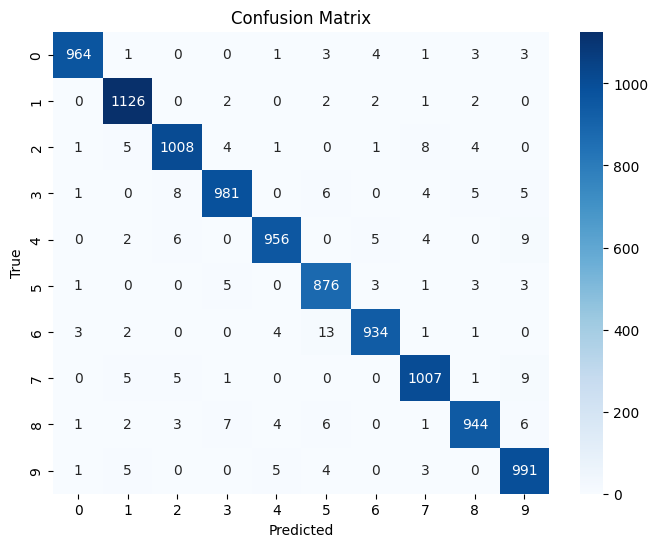

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

y_pred = np.argmax(best_model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [8]:
best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cross_entropy_loss = best_model.evaluate(x_test, y_test)

print(f"Cross-Entropy Loss: {cross_entropy_loss[0]}, Accuracy: {cross_entropy_loss[1]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0925
Cross-Entropy Loss: 0.08218851685523987, Accuracy: 0.9786999821662903


Best model config: {'epochs': 5, 'num_layers': 3, 'neurons': 128, 'batch_size': 16, 'optimizer': 'adam', 'activation': 'relu'} with validation accuracy: 0.9793333411216736